In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
#a = 13
#m = 31
#c = 0
#x_0 = 3

In [2]:
#lista 1
#u1 = my_rand(13,31,0,3,1000)
#u2 = my_rand(20,53,0,4,1000)
#u1_np = np.array(u1)
#u2_np = np.array(u2)

In [3]:
#length = u1_np*u1_np + u2_np*u2_np
#length_bool = length < 1
#correct = np.count_nonzero(length_bool)
#number_of_correct = correct/1000
#print(number_of_correct)
"""To były własne próby podejścia do zadania 1.1, zanim zostało pokazane, że da się to zrobić w 2 linijkach"""

'To były własne próby podejścia do zadania 1.1, zanim zostało pokazane, że da się to zrobić w 2 linijkach'

In [4]:
#zadanie 1.1
def oszacuj_pi(N):
    x = np.random.random(size=N)
    y = np.random.random(size=N)
    return  4*np.mean(x**2 + y**2<=1)



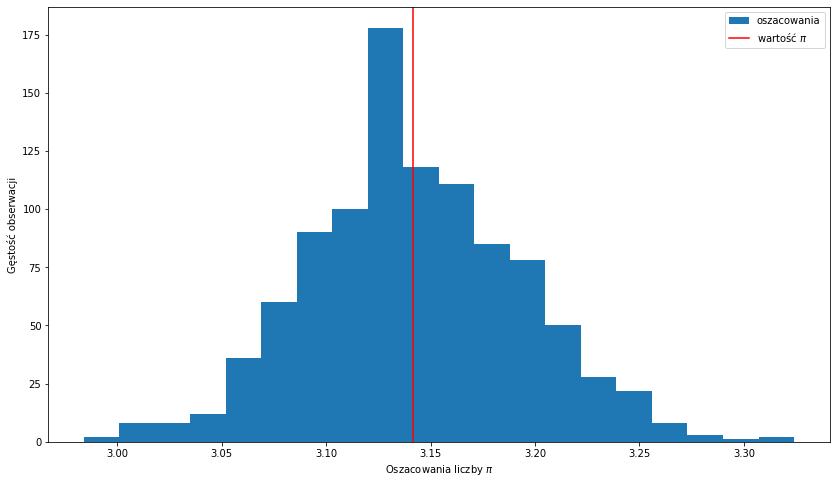

In [5]:
#zadanie 1.2
np.random.seed(123456) # ustawiam ziarno generatora liczb pseudolosowych

plt.figure(figsize=(14,8))
_ , bins, _ = plt.hist([oszacuj_pi(1000) for N in range(1000)], bins=20, label="oszacowania");

plt.axvline(np.pi, color="red", label="wartość $\pi$")
plt.xlabel("Oszacowania liczby $\pi$")
plt.ylabel("Gęstość obserwacji")
plt.legend()

Text(0, 0.5, 'wariancja')

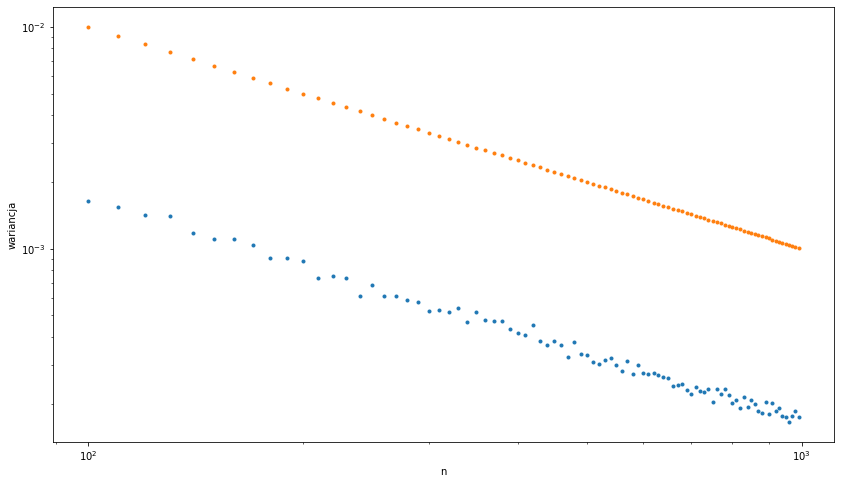

In [6]:
#zadanie 1.3
plt.figure(figsize=(14,8))
z = np.array([np.var([oszacuj_pi(i)/4 - np.pi/4 for N in range(1000)]) for i in np.arange(100,1000,10)])
plt.loglog(np.arange(100,1000,10),z,".",label = "wariancja empiryczna")
plt.loglog(np.arange(100,1000,10),1/(np.arange(100,1000,10)),".",label = "1/n")
plt.xlabel("n")
plt.ylabel("wariancja")
#zasadniczo liczymy tutaj wariancję na próbie 1000 oszacowań pi/4, ale stale zmieniamy liczbę losowanych punktów

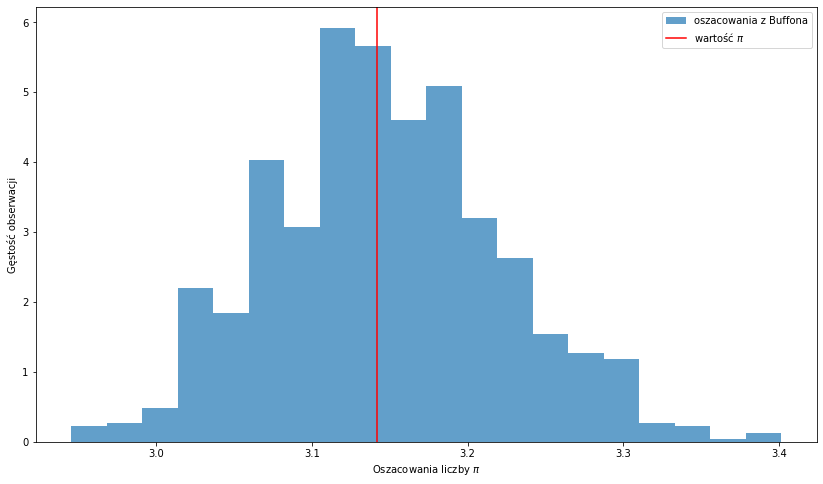

In [7]:
#zadanie 1.4
#przyjmuję d za 1
def buffon_needle(N):
    x = np.random.uniform(0,1,N)
    y = np.random.uniform(0,180,N)
    return 2/np.mean(x < np.sin(np.radians(y)))

plt.figure(figsize=(14,8))
_ , bins, _ = plt.hist([buffon_needle(1000) for N in range(1000)], bins=20, alpha=0.7, density=True, label="oszacowania z Buffona")
plt.axvline(np.pi, color="red", label="wartość $\pi$")
plt.xlabel("Oszacowania liczby $\pi$")
plt.ylabel("Gęstość obserwacji")
plt.legend()
#nadal, korzystamy z pi licząc pi, dlatego poniżej jest poprawniejsza wersja. Nie wiedziałem sam jak to zrobić, bo próbowałem bez pętli, ale chyba średnio się da 
#próbowałem też korzystając ze wskazówki, ale wtedy wyszło mi pi równe około 3.5

In [8]:

@jit()
def igla_buffona(n):
    sukcesy = 0
    for i in range(n):
        x = np.random.random()
        y = np.random.random()
        while x**2 + y**2 > 1:
            x = np.random.random()
            y = np.random.random()
        z = 0.5*np.random.random() 
        if z <= (1/2)*(y/(x**2 + y**2)**(1/2)):
            sukcesy += 1
            
    return 2*n/sukcesy

#zapamiętać - numba

In [13]:
igla_buffona(100000000)

3.1416121085144866

In [10]:
#zadanie 2.1
def toss_a_coin(n = 1000):
    """Orzeł - 0, reszka - 1. Symulujemy n rozgrywek i zwracamy prawdopodobieństwo wygranej gracza 1."""
    p1 = [1,1,0]
    p2 = [1,0,0]
    win = 0
    for i in range(n):
        end = False
        alist = [np.random.randint(0,2) for a in range(3)]
        while not end:
            if alist[-3:] == p1:
                win += 1
                end = True
            elif alist[-3:] == p2:
                end = True
            else:
                alist.append(np.random.randint(0,2))
    return win/n


In [11]:
toss_a_coin(10000)

0.6686